<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/2348549_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns=['gender' ,'Partner'	,'Dependents','PhoneService',	'MultipleLines'	,'InternetService',	'OnlineSecurity','DeviceProtection'	,'TechSupport','StreamingTV',	'StreamingMovies','Contract'	,'PaperlessBilling'	,'PaymentMethod','Churn']
data_encoded=pd.get_dummies(data[categorical_columns])
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_features = one_hot_encoder.fit_transform(data_encoded)
print(encoded_features)

[[0. 1. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
data_df=pd.DataFrame(categorical_columns)
print(data_df)

                   0
0             gender
1            Partner
2         Dependents
3       PhoneService
4      MultipleLines
5    InternetService
6     OnlineSecurity
7   DeviceProtection
8        TechSupport
9        StreamingTV
10   StreamingMovies
11          Contract
12  PaperlessBilling
13     PaymentMethod
14             Churn


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
X= data.drop(['Churn','customerID']+list(non_numeric_columns), axis=1)
y = data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
base_model =linear_model.LogisticRegression()
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
y_pred ,y_test


(array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object),
 2180     No
 365     Yes
 45       No
 6149     No
 5057     No
        ... 
 6746    Yes
 5890     No
 287     Yes
 3152     No
 1338    Yes
 Name: Churn, Length: 1409, dtype: object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the baseline logistic regression model: {accuracy:.2f}")

Accuracy of the baseline logistic regression model: 0.78


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef
y_test_binary = (y_test == 'Yes').astype(int)
y_pred_binary = (y_pred == 'Yes').astype(int)
precision=precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
kappa_score = cohen_kappa_score(y_test_binary, y_pred_binary)
matthews_coefficient = matthews_corrcoef(y_test_binary, y_pred_binary)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Cohen's Kappa Score: {kappa_score:.2f}")
print(f"Matthews Correlation Coefficient: {matthews_coefficient:.2f}")

Precision: 0.62
Recall: 0.43
F1-score: 0.51
ROC AUC: 0.67
Cohen's Kappa Score: 0.37
Matthews Correlation Coefficient: 0.38


In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_binary, y_pred_binary)
cnf_matrix

array([[935,  99],
       [213, 162]])

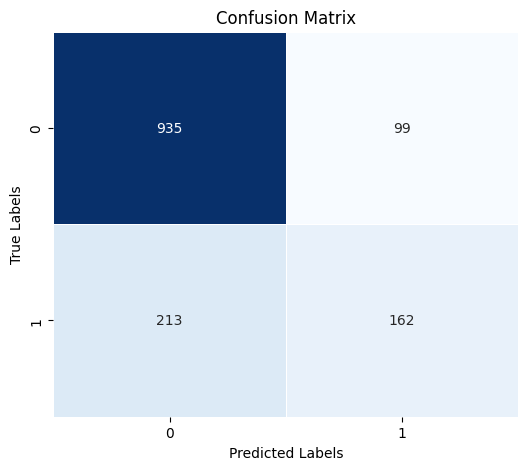

In [ ]:
plt.figure(figsize=(6,5))
sn.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

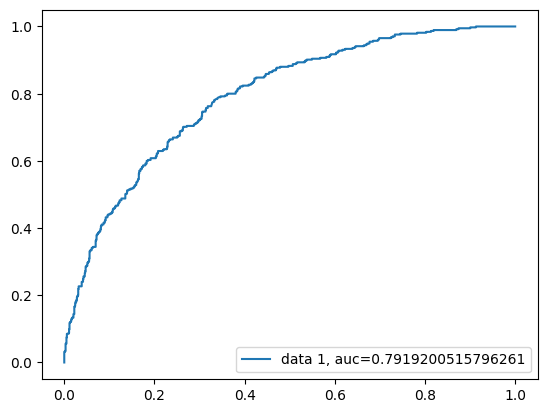

In [ ]:
y_pred_proba = base_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_binary,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_binary, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

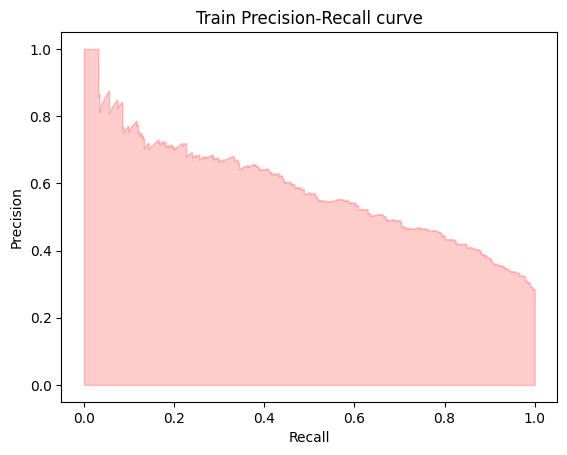

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
plt.fill_between(recall, precision ,step='post' ,alpha=0.2,color='red')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test_binary,y_pred_proba)

0.4673755069795653

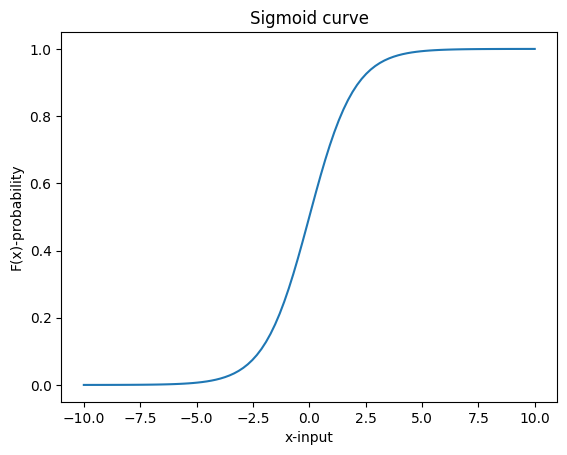

In [ ]:
import numpy as np
x = np.linspace(-10, 10, 100)  # Range of x-values
y_pred_proba = x  # Replace this with your predicted probabilities

# Calculate the sigmoid function for each x-value
y = 1 / (1 + np.exp(-y_pred_proba))

#create plot
plt.plot(x, y)
plt.title("Sigmoid curve")
plt.xlabel('x-input')
plt.ylabel('F(x)-probability')
plt.show()


In [ ]:
y_pred_proba

array([0.1018141 , 0.728511  , 0.1347958 , ..., 0.59080911, 0.44776435,
       0.2279427 ])

<Axes: >

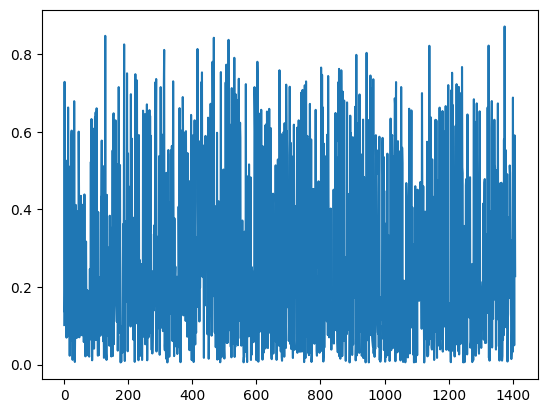

In [ ]:
pd.Series(y_pred_proba).plot()